Map average movie length of Indian movies by language.
Criteria used: >=25 movies. In 1991-2017

In [1]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapefile
%matplotlib inline

In [2]:
data_pd = pd.read_csv('../results/country_language_runtime_count.tsv', 
                      sep='\t',  encoding='latin1')
data_pd.head(3)

,countries_first,languages_first,running_times_first,kind
0,Algeria,Arabic,1.681667,40
1,Algeria,Berber,1.716667,2
2,Algeria,English,1.616667,1


#### Extract Indian movies

In [3]:
india_pd = data_pd[data_pd['countries_first']=='India'].copy()
india_pd.sort_values('kind', ascending=False, inplace=True)
print(len(india_pd))
india_pd

40


,countries_first,languages_first,running_times_first,kind
644,India,Hindi,2.166986,2347
654,India,Malayalam,2.163855,812
664,India,Tamil,2.355305,776
665,India,Telugu,2.392572,644
632,India,Bengali,2.114825,543
656,India,Marathi,2.091483,362
646,India,Kannada,2.270019,348
638,India,English,1.632535,334
661,India,Punjabi,2.234954,216
659,India,Oriya,2.451225,136


###### Filter languages with >=25 movies

In [4]:
india_pd = india_pd[india_pd['kind']>=25]
print(len(india_pd))
# india_pd.sort_values('kind', ascending=False)

12


###### Get rid of English language ones. Doubt they are really made in India.

In [5]:
india_pd = india_pd[india_pd['languages_first'] != 'English']
india_pd.sort_values('running_times_first', inplace=True)
india_pd

,countries_first,languages_first,running_times_first,kind
630,India,Assamese,1.823333,25
656,India,Marathi,2.091483,362
632,India,Bengali,2.114825,543
654,India,Malayalam,2.163855,812
644,India,Hindi,2.166986,2347
661,India,Punjabi,2.234954,216
641,India,Gujarati,2.263710,62
646,India,Kannada,2.270019,348
664,India,Tamil,2.355305,776
665,India,Telugu,2.392572,644


###### Map states to languages

Both Hindi and Marathi movies are from state Maharasthra.
Marathi language is excluded from mapping for sake of simplicity.

In [6]:
lang_state_dict = {'Bengali': 'West Bengal', 'Gujarati': 'Gujarat',
                   'Hindi': 'Maharashtra', 'Kannada': 'Karnataka',
                   'Malayalam': 'Kerala', 'Marathi': '',
                   'Oriya': 'Odisha', 'Punjabi': 'Punjab',
                   'Tamil': 'Tamil Nadu', 'Telugu': 'Andhra Pradesh',
                   'Assamese': 'Assam'
                  }

In [7]:
india_pd['state'] = india_pd['languages_first'].map(lang_state_dict)
india_pd

,countries_first,languages_first,running_times_first,kind,state
630,India,Assamese,1.823333,25,Assam
656,India,Marathi,2.091483,362,
632,India,Bengali,2.114825,543,West Bengal
654,India,Malayalam,2.163855,812,Kerala
644,India,Hindi,2.166986,2347,Maharashtra
661,India,Punjabi,2.234954,216,Punjab
641,India,Gujarati,2.263710,62,Gujarat
646,India,Kannada,2.270019,348,Karnataka
664,India,Tamil,2.355305,776,Tamil Nadu
665,India,Telugu,2.392572,644,Andhra Pradesh


###### Decide on colors by movie length

In [8]:
# cmap = 'RdYlBu'
# cmap = 'Purples'
cmap = 'Spectral'

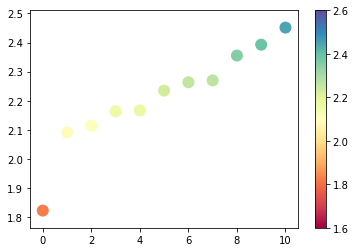

In [9]:
df = india_pd['running_times_first']
cmap = plt.cm.get_cmap(cmap) # Colour map (there are many others)

fig, ax = plt.subplots()
# Now here's the plot. range(len(df)) just makes the x values 1, 2, 3...
# df[0] is then the y values. c sets the colours (same as y values in this
# case). s is the marker size.
ccc = ax.scatter(range(len(df)), df, c=df, s=120, cmap=cmap, vmin=1.6, vmax=2.6)
cbar = fig.colorbar(ccc)
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
plt.show()

In [10]:
india_pd['color'] = list(ccc.get_facecolors())
india_pd

,countries_first,languages_first,running_times_first,kind,state,color
630,India,Assamese,1.823333,25,Assam,"[0.965167243368, 0.487427912341, 0.29042675893..."
656,India,Marathi,2.091483,362,,"[0.999615532488, 0.988081507113, 0.72902729719..."
632,India,Bengali,2.114825,543,West Bengal,"[0.986543637063, 0.994617454825, 0.72802768166..."
654,India,Malayalam,2.163855,812,Kerala,"[0.936562860438, 0.974625144175, 0.65005767012..."
644,India,Hindi,2.166986,2347,Maharashtra,"[0.932718185313, 0.973087274125, 0.64405997693..."
661,India,Punjabi,2.234954,216,Punjab,"[0.82029988466, 0.927566320646, 0.612687427912..."
641,India,Gujarati,2.263710,62,Gujarat,"[0.756785851596, 0.901730103806, 0.62560553633..."
646,India,Kannada,2.270019,348,Karnataka,"[0.738638985006, 0.894348327566, 0.62929642445..."
664,India,Tamil,2.355305,776,Tamil Nadu,"[0.516724336794, 0.80645905421, 0.645367166474..."
665,India,Telugu,2.392572,644,Andhra Pradesh,"[0.42122260669, 0.769088811995, 0.646751249519..."


In [11]:
state_color_dict = dict(zip(india_pd['state'], india_pd['color']))

###### Function to add states to the map

In [12]:
def add_state_bounds(state, color, alpha):
    ax.add_geometries(state.geometry, ccrs.PlateCarree(),
    edgecolor='black', linewidth=0.4,
    facecolor=color, alpha=alpha)

###### Function to add language in the map

In [13]:
lang_geo_dict = {'Assamese': (90.54, 26.10),
#                 'Marathi': ( ),
                'Bengali': (87.00, 22.97),
                'Malayalam': (71.96, 9.40),
                'Hindi': (74.22, 19.08),
                'Punjabi': (72.62, 30.64),
                'Gujarati': (69.50, 22.52),
                'Kannada': (72.59, 13.79),
                'Tamil': (76.97, 10.78),
                'Telugu': (78.04, 16.38 ),
                'Oriya': (83.59, 20.25 )
                }

In [14]:
state2lang_dict = dict(zip(lang_state_dict.values(),lang_state_dict.keys()))
def add_lang_to_map(state_name, state2lang_dict, lang_geo_dict):
    lang = state2lang_dict[state_name]
    lon, lat = lang_geo_dict[lang]
    ax.text(lon, lat, lang,
             horizontalalignment='left',
             transform=ccrs.Geodetic())

In [15]:
# Map shapefile source: https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127
fname = "..//data//India_SHP_arcgis//INDIA.shp"
shape_f = shpreader.Reader(fname)
records_shp = list(shape_f.records())
geometries_shp = list(shape_f.geometries())

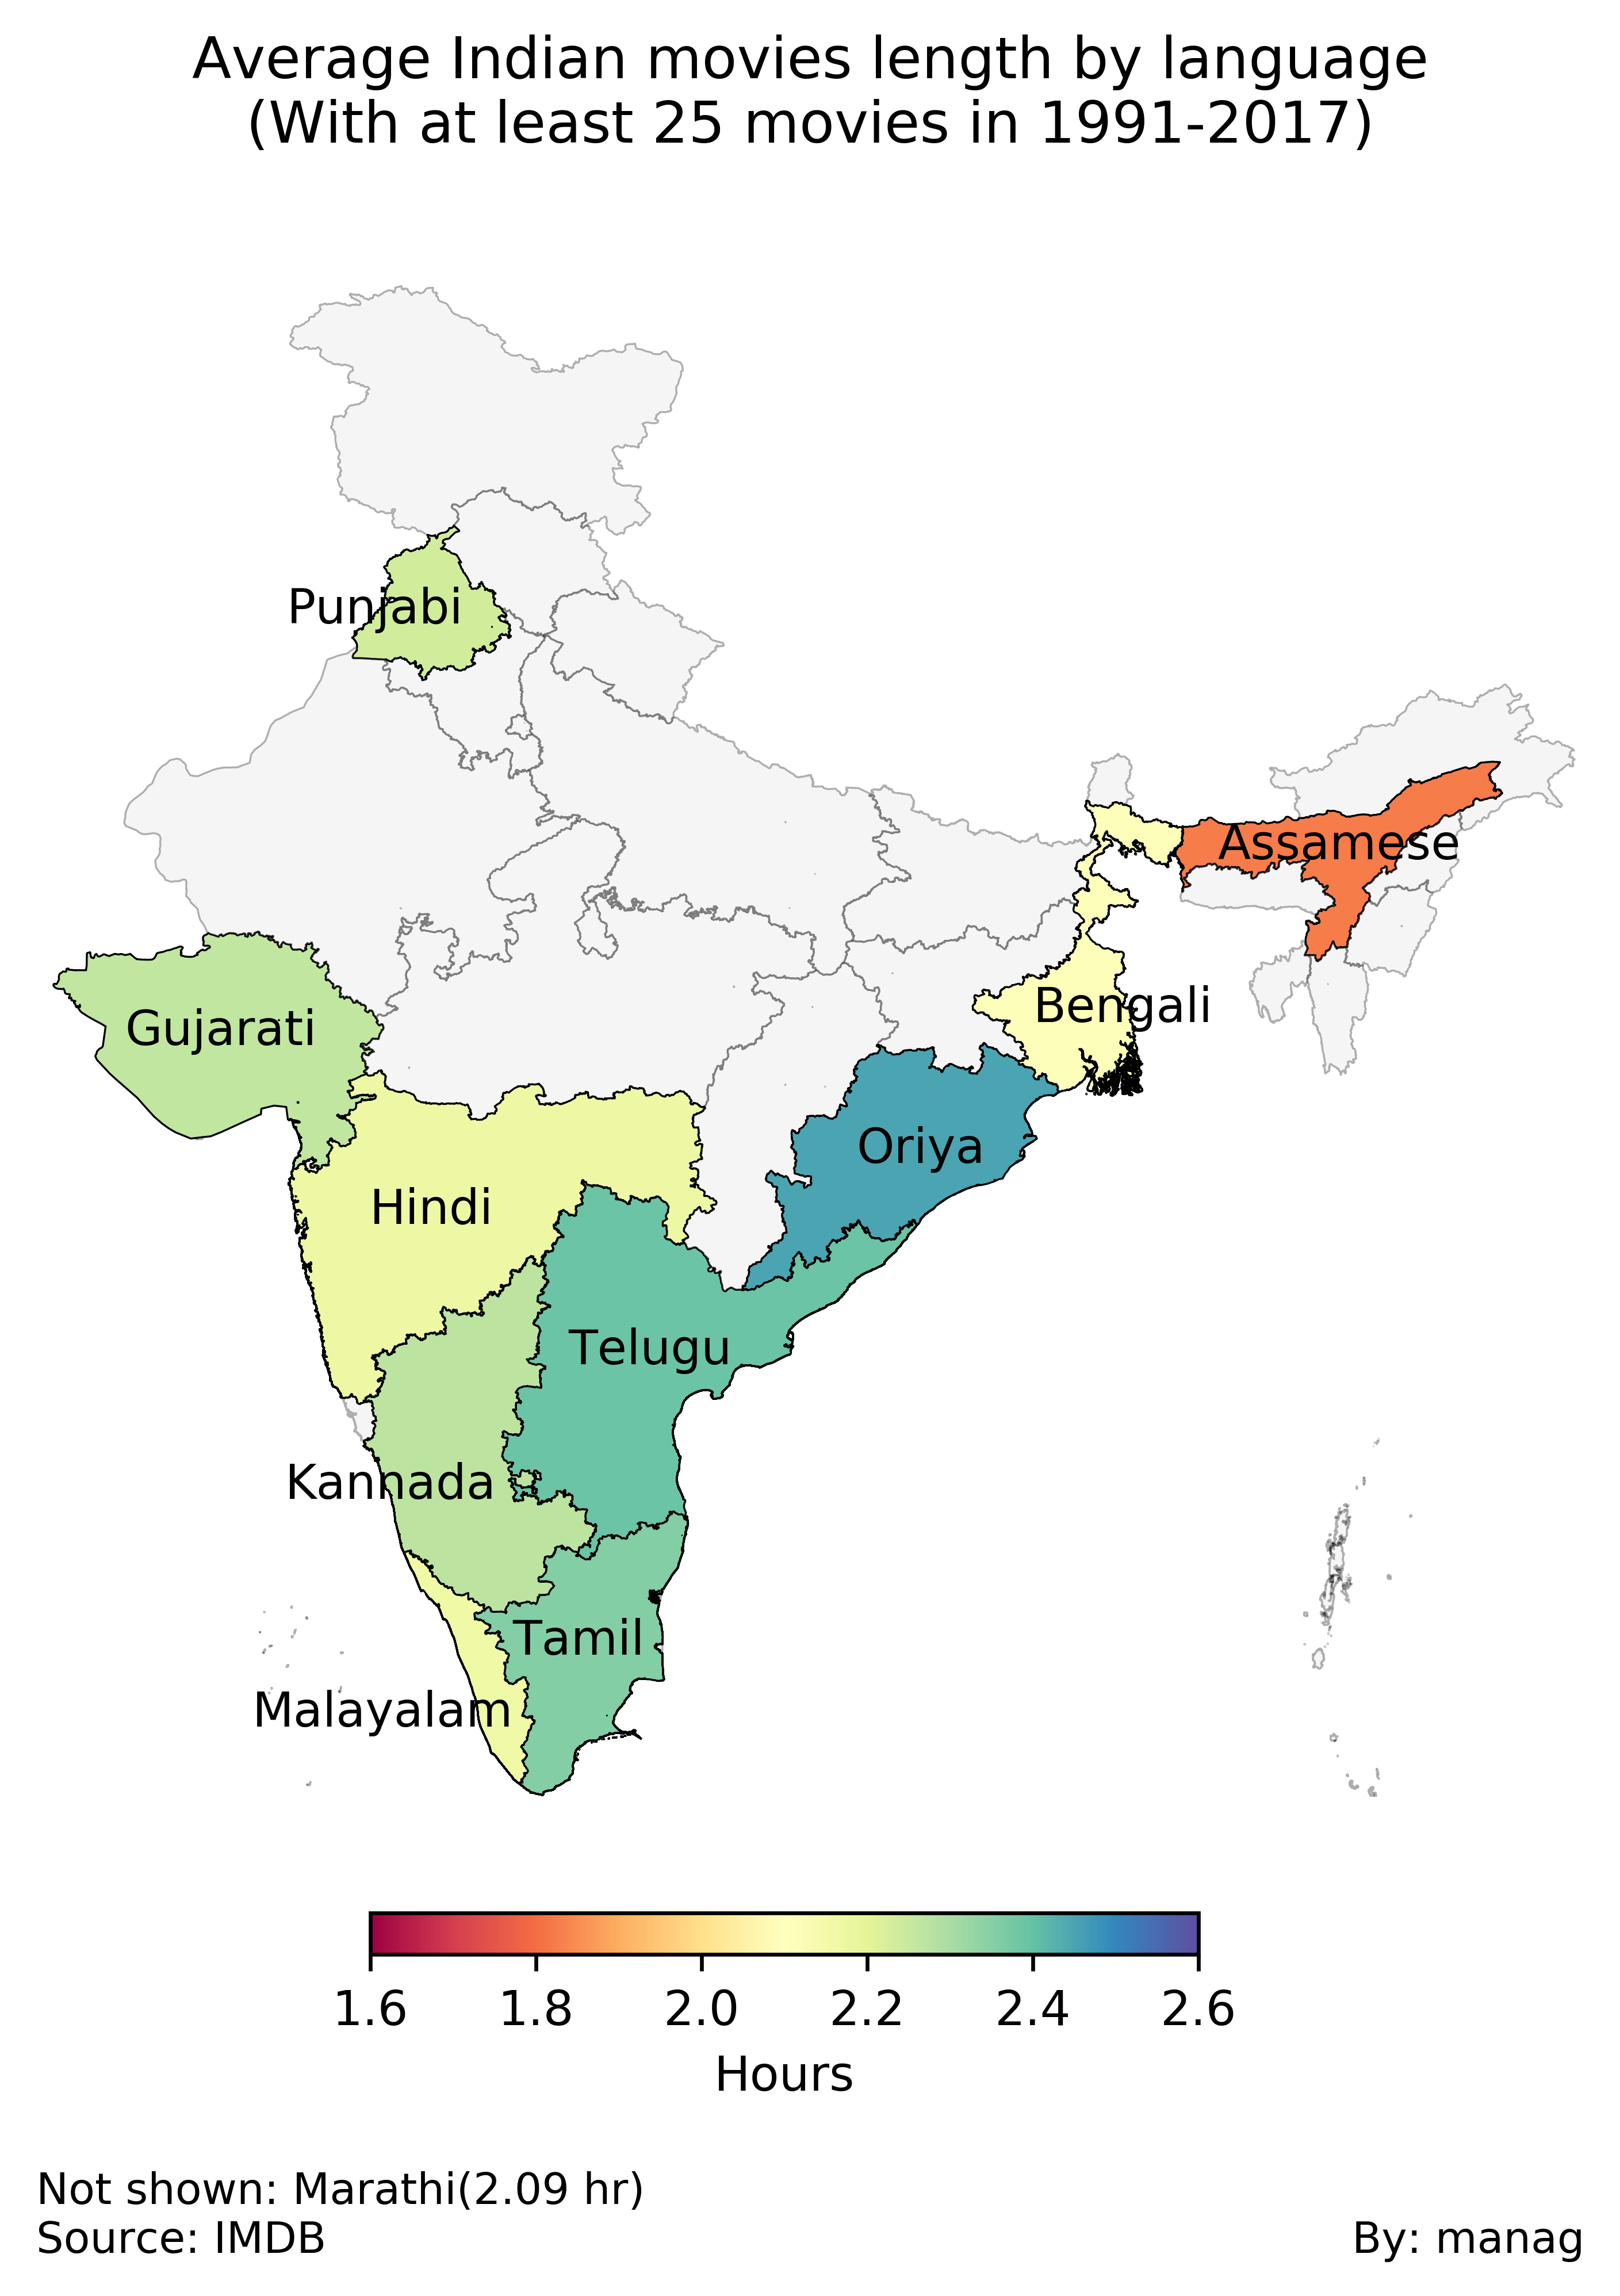

In [16]:
# fig = plt.figure(figsize=(6,6))
fig = plt.figure(figsize=(6,6), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())

for state in records_shp:
    state_name = state.attributes['ST_NAME']
        
    if state_name == 'Orissa':
        state_name = 'Odisha'
    
    if state_name in lang_state_dict.values():
        add_state_bounds(state, state_color_dict[state_name], 1)
        
        add_lang_to_map(state_name, state2lang_dict, lang_geo_dict)
    elif state_name == 'Telangana':
        add_state_bounds(state, state_color_dict['Andhra Pradesh'], 1)
    else:
        add_state_bounds(state, '#E0E0E0', 0.3)
        
ax.set_extent([67.8, 97.6, 8, 38.1], ccrs.PlateCarree())
ax.outline_patch.set_edgecolor('white')
ax.set_title('Average Indian movies length by language\n' +
             '(With at least 25 movies in 1991-2017)\n')

import matplotlib as mpl
# Make a figure and axes with dimensions as desired.
ax1 = fig.add_axes([0.3, 0.05, 0.4, 0.02])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
# cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=1.6, vmax=2.6)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
ax1.set_xlabel('Hours', rotation=0)

plt.text(0, -0.29,"Not shown: Marathi(2.09 hr)\n" + 'Source: IMDB',
         fontsize=9, transform = ax.transAxes)
plt.text(0.85, -0.29,'\nBy: manag',
         fontsize=9, transform = ax.transAxes)

fig.savefig('..//results//India_movie_length.png',  bbox_inches='tight')